<a href="https://colab.research.google.com/github/sowmen/Deepfake-Challenge-Kaggle/blob/master/Logistic_Network_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import os, sys, time
import math
import random
import cv2
from tqdm import tqdm_notebook as tqdm
import pickle 

%matplotlib inline
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# **Data Creation**

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/dataset_0_22.csv')
df2 = pd.read_csv('/content/drive/My Drive/dataset_23_40.csv')

In [ ]:
train_df = pd.concat([df1, df2], ignore_index=True)
train_df

,filename,label,split,original,video_path
0,owxbbpjpch.mp4,1,train,wynotylpnm.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/owxbbpjpch.mp4
1,vpmyeepbep.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/vpmyeepbep.mp4
2,fzvpbrzssi.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/fzvpbrzssi.mp4
3,htorvhbcae.mp4,1,train,wclvkepakb.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/htorvhbcae.mp4
4,fckxaqjbxk.mp4,1,train,vpmyeepbep.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_0/fckxaqjbxk.mp4
...,...,...,...,...,...
96773,jfihvhrjyr.mp4,1,train,qllhpepyum.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/jfihvhrjyr.mp4
96774,xgqerzezcm.mp4,0,train,NaN,/content/drive/My Drive/Dataset2/dfdc_train_part_40/xgqerzezcm.mp4
96775,hsxhkffniw.mp4,1,train,cxvctggwxi.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/hsxhkffniw.mp4
96776,bqyybmnxmk.mp4,1,train,zukdhmubyy.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/bqyybmnxmk.mp4


,filename,split,original,video_path
label,,,,
0,15281,15281,0,15281
1,81497,81497,81497,81497


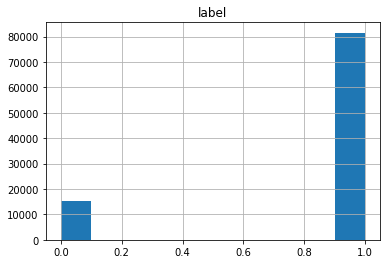

In [ ]:
train_df.hist(column="label")
train_df.groupby('label').count()

In [ ]:
s0 = train_df.label[train_df.label.eq(0)].sample(100).index
s1 = train_df.label[train_df.label.eq(1)].sample(100).index 
sample_df = train_df.loc[s0.union(s1)]
sample_df

,filename,label,split,original,video_path
734,ldtgofdaqg.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_0/ldtgofdaqg.mp4
1360,kvmpmhdxly.mp4,0,train,NaN,/content/drive/My Drive/Dataset/dfdc_train_part_1/kvmpmhdxly.mp4
1378,udynlsccpj.mp4,1,train,fneqiqpqvs.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_1/udynlsccpj.mp4
2033,uyxutdwcep.mp4,1,train,blkbkvcffn.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_1/uyxutdwcep.mp4
2986,aosnzkbllm.mp4,1,train,znvdxgaoay.mp4,/content/drive/My Drive/Dataset/dfdc_train_part_1/aosnzkbllm.mp4
...,...,...,...,...,...
92562,jtgesoyiiy.mp4,1,train,fsghozvjzf.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_39/jtgesoyiiy.mp4
93092,gflpvwmxnp.mp4,1,train,ujjkzsdtiz.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_39/gflpvwmxnp.mp4
94635,imkrunyvib.mp4,1,train,rqixtupxso.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/imkrunyvib.mp4
95354,occkpccqxi.mp4,1,train,dxuxkyqhof.mp4,/content/drive/My Drive/Dataset2/dfdc_train_part_40/occkpccqxi.mp4


# **Data Load**

In [ ]:
# sample_df = pd.read_csv('/content/drive/My Drive/100_2.csv')

In [ ]:
real_dir = [f for f in sample_df.video_path if sample_df.loc[sample_df.video_path == f].label.item() == 0]
fake_dir = [f for f in sample_df.video_path if sample_df.loc[sample_df.video_path == f].label.item() == 1]
print(real_dir[0:5])
print(fake_dir[0:5])

video_dir = []
for f in real_dir:
    video_dir.append((f,0))
for f in fake_dir:
    video_dir.append((f,1))

random.shuffle(video_dir)
video_dir[:5]

['/content/drive/My Drive/Dataset/dfdc_train_part_0/ldtgofdaqg.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_1/kvmpmhdxly.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_2/sxryoeigag.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_2/gxbkcxyfjm.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_3/hcpxaobnjr.mp4']
['/content/drive/My Drive/Dataset/dfdc_train_part_1/udynlsccpj.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_1/uyxutdwcep.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_1/aosnzkbllm.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_2/rvvpazsffd.mp4', '/content/drive/My Drive/Dataset/dfdc_train_part_4/clyolrxzxs.mp4']


[('/content/drive/My Drive/Dataset2/dfdc_train_part_23/jafxzaqcao.mp4', 1),
 ('/content/drive/My Drive/Dataset/dfdc_train_part_2/sxryoeigag.mp4', 0),
 ('/content/drive/My Drive/Dataset/dfdc_train_part_5/wesfjdkwfn.mp4', 1),
 ('/content/drive/My Drive/Dataset2/dfdc_train_part_32/mtahbpogdp.mp4', 0),
 ('/content/drive/My Drive/Dataset2/dfdc_train_part_34/nszxkhqmrg.mp4', 0)]

# **Frame Seperation**

In [ ]:
input_size = 224
frames_per_video = 30

def _read_frames_at_indices(path, capture, frame_idxs):
    try:
        frames = []
        idxs_read = []
        for frame_idx in range(frame_idxs[0], frame_idxs[-1] + 1):
            # Get the next frame, but don't decode if we're not using it.
            ret = capture.grab()
            if not ret:
                print("Error grabbing frame %d from movie %s" % (frame_idx, path.split('/',4)[-1]))
                break

            # Need to look at this frame?
            current = len(idxs_read)
            if frame_idx == frame_idxs[current]:
                ret, frame = capture.retrieve()
                if not ret or frame is None:
                    print("Error retrieving frame %d from movie %s" % (frame_idx, path.split('/',4)[-1]))
                    break

                frame = _postprocess_frame(frame)
                frames.append(frame)
                idxs_read.append(frame_idx)

        if len(frames) > 0:
            return frames
        print("No frames read from movie %s" % path)
        return None
    except:
        print("Exception while reading movie %s" % path.split('/',4)[-1])
        return None 

def _postprocess_frame(frame, insets=(0,0)):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    if insets[0] > 0:
        W = frame.shape[1]
        p = int(W * insets[0])
        frame = frame[:, p:-p, :]

    if insets[1] > 0:
        H = frame.shape[1]
        q = int(H * insets[1])
        frame = frame[q:-q, :, :]

    return frame 

def read_frames(path, num_frames=frames_per_video, jitter=0, seed=None):
    """Reads frames that are always evenly spaced throughout the video.

        Arguments:
            path: the video file
            num_frames: how many frames to read, -1 means the entire video
                (warning: this will take up a lot of memory!)
            jitter: if not 0, adds small random offsets to the frame indices;
                this is useful so we don't always land on even or odd frames
            seed: random seed for jittering; if you set this to a fixed value,
                you probably want to set it only on the first video 
    """
    assert num_frames > 0

    capture = cv2.VideoCapture(path)
    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    if frame_count <= 0: return None

    frame_idxs = np.linspace(0, frame_count - 1, num_frames, endpoint=True, dtype=np.int)
    if jitter > 0:
        np.random.seed(seed)
        jitter_offsets = np.random.randint(-jitter, jitter, len(frame_idxs))
        frame_idxs = np.clip(frame_idxs + jitter_offsets, 0, frame_count - 1)

    result = _read_frames_at_indices(path, capture, frame_idxs)
    capture.release()
    return result

def isotropically_resize_image(img, size, resample=cv2.INTER_AREA):
    h, w = img.shape[:2]
    if w > h:
        h = h * size // w
        w = size
    else:
        w = w * size // h
        h = size

    resized = cv2.resize(img, (w, h), interpolation=resample)
    return resized


def make_square_image(img):
    h, w = img.shape[:2]
    size = max(h, w)
    t = 0
    b = size - h
    l = 0
    r = size - w
    return cv2.copyMakeBorder(img, t, b, l, r, cv2.BORDER_CONSTANT, value=0)

In [ ]:
sys.path.insert(1,'/content/drive/My Drive/YoloV2' )
import yolov2

mobilenetv2 = yolov2.load_mobilenetv2_224_075_detector("/content/drive/My Drive/YoloV2/facedetection-mobilenetv2-size224-alpha0.75.h5")
yolo_model = yolov2.FaceDetector(model=mobilenetv2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
def get_faces(frames):
    faces = []
    for face in frames:
        yolo_boxes = yolo_model.detect(face, 0.7)
        yb = yolov2.get_boxes_points(yolo_boxes, face.shape)
        
        for b in yb:
            lx, ly, rx, ry = b
            # x, y, w, h here
            # ax.add_patch(Rectangle((lx,ly),rx - lx,ry - ly,linewidth=2,edgecolor='red',facecolor='none'))
            img_crop = face[ly:ry, lx:rx]
            resized_face = cv2.resize(img_crop, (224,224), interpolation=cv2.INTER_CUBIC)
            # resized_face = isotropically_resize_image(img_crop, input_size)
            # resized_face = make_square_image(resized_face)
            faces.append(resized_face)
    return faces

# Array Initialization

In [ ]:
for path in tqdm(video_dir):
    if(os.path.exists(path[0]) == 0):
        print(path)

In [ ]:
x_orig = []
y_orig = []
X_test = []
Y_test = []

In [ ]:
for f in tqdm(video_dir):
    try:
        frames = read_frames(f[0])
        faces = get_faces(frames)
        x_orig.extend(faces)
        y_orig.extend([f[1]] * len(faces))
    except Exception as e:
        print("Error on video %s: %s" % (f[0], str(e)))

# **Array Store/Load**

In [ ]:
# Save list to pickle
with open('x_2.pkl', 'wb') as f:
    pickle.dump(x_orig, f)

with open('y_2.pkl', 'wb') as f:
    pickle.dump(y_orig,f )

In [ ]:
with open('/content/drive/My Drive/x_orig.pkl', 'rb') as f:
    x_orig = pickle.load(f)

with open('/content/drive/My Drive/y_orig.pkl', 'rb') as f:
    y_orig = pickle.load(f)

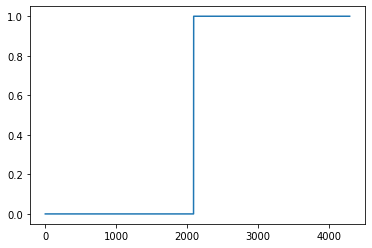

In [ ]:
plt.plot(y_orig)

In [ ]:
with open('/content/drive/My Drive/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('/content/drive/My Drive/y_test.pkl', 'rb') as f:
    Y_test = pickle.load(f)

In [ ]:
temp = list(zip(X_test, Y_test))
random.shuffle(temp)

X_test, Y_test = zip(*temp)
del(temp)
gc.collect()

15

# Resize

In [ ]:
print(len(x_orig), len(y_orig))
print(x_orig[0].shape)

6135 6135
(224, 224, 3)


In [ ]:
x_np = np.array(x_orig).reshape(-1, 224, 224, 3)
y_np = np.array(y_orig)
# X_test = np.array(X_test).reshape(-1,224,224,3)
# Y_test = np.array(Y_test)

In [ ]:
print(x_np.shape)
print(y_np.shape)

(6135, 224, 224, 3)
(6135,)


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, Y_train, Y_val = train_test_split(x_np, y_np, test_size=0.20, random_state=4)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)


Shape of X_train: (4908, 224, 224, 3)
Shape of X_val: (1227, 224, 224, 3)
Shape of Y_train: (4908,)
Shape of Y_val: (1227,)


In [ ]:
x_np = x_np / 255.0
X_val = X_val / 255
X_train = X_train / 255.0

# **Manual Logistic Network**

### Model Definitions

In [ ]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ


In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
          
    return parameters

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A, parameters['W'+str(l)], parameters['b'+str(l)], "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))     
    return AL, caches

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = np.sum(np.log(AL)*Y + (1-Y)*np.log(1-AL)) / m    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    return cost

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

### Training

In [ ]:
layers_dims = [X_train_flatten.shape[0], 50, 25, 16, 8, 1] 

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0005, num_iterations = 5000, print_cost=True):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    predictions, caches = L_model_forward(X, parameters)
    # predictions = []
    # for x in AL[0]:
    #     if(x <= 0.5):
    #         predictions.append(0)
    #     else:
    #         predictions.append(1)
    
    return np.array(predictions).reshape(AL.shape[0],AL.shape[1])

In [ ]:
parameters = L_layer_model(X_train_flatten, Y_train, layers_dims)

Cost after iteration 1600: -0.692940
Cost after iteration 1700: -0.692929
Cost after iteration 1800: -0.692919
Cost after iteration 1900: -0.692909
Cost after iteration 2000: -0.692899
Cost after iteration 2100: -0.692890
Cost after iteration 2200: -0.692881
Cost after iteration 2300: -0.692872
Cost after iteration 2400: -0.692863
Cost after iteration 2500: -0.692854
Cost after iteration 2600: -0.692846
Cost after iteration 2700: -0.692838
Cost after iteration 2800: -0.692830
Cost after iteration 2900: -0.692822
Cost after iteration 3000: -0.692815
Cost after iteration 3100: -0.692808
Cost after iteration 3200: -0.692800
Cost after iteration 3300: -0.692793
Cost after iteration 3400: -0.692787
Cost after iteration 3500: -0.692780
Cost after iteration 3600: -0.692773
Cost after iteration 3700: -0.692767


In [ ]:
predictions_train = predict(X_train_flatten, parameters)

In [ ]:
predictions_test = predict(X_val_flatten, parameters)

In [ ]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - Y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - Y_val)) * 100))

# **Logistic Network**

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from keras import regularizers

Using TensorFlow backend.


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dense(256, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(8, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=150, validation_data=(X_val, Y_val))
gc.collect()

Epoch 1/150
108/108 [==============================] - 2s 16ms/step - loss: 0.6941 - accuracy: 0.5137 - val_loss: 0.6935 - val_accuracy: 0.4721
Epoch 2/150
108/108 [==============================] - 2s 14ms/step - loss: 0.6949 - accuracy: 0.5015 - val_loss: 0.6925 - val_accuracy: 0.5337
Epoch 3/150
108/108 [==============================] - 1s 13ms/step - loss: 0.6924 - accuracy: 0.5128 - val_loss: 0.6940 - val_accuracy: 0.4698
Epoch 4/150
108/108 [==============================] - 1s 13ms/step - loss: 0.6928 - accuracy: 0.5201 - val_loss: 0.6935 - val_accuracy: 0.5047
Epoch 5/150
108/108 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5122 - val_loss: 0.6938 - val_accuracy: 0.4686
Epoch 6/150
108/108 [==============================] - 1s 13ms/step - loss: 0.6929 - accuracy: 0.5131 - val_loss: 0.6944 - val_accuracy: 0.4674
Epoch 7/150
108/108 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.5201 - val_loss: 0.6940 - val_accuracy:

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

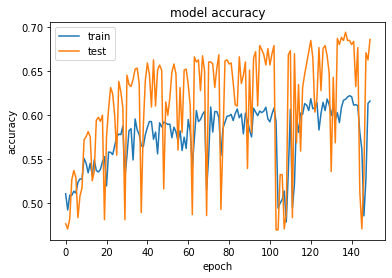

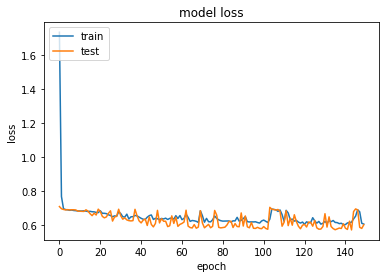

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

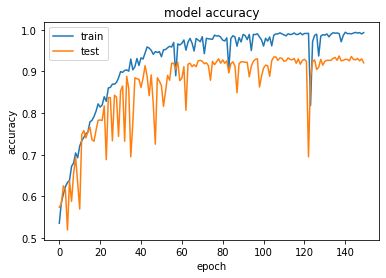

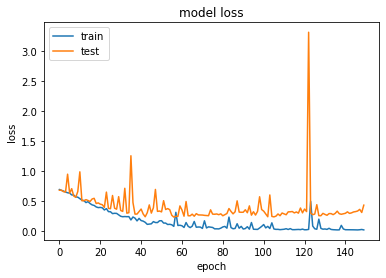

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, Y_test, batch_size=32)

In [ ]:
results

[3.099280230278712, 0.54238874]

In [ ]:
model.metrics_names

['loss', 'accuracy']

# Import

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from mpl_toolkits.axes_grid1 import ImageGrid

# **Conv2D**

In [ ]:
model2 = Sequential()

model2.add(Conv2D(256, (5, 5), kernel_regularizer=l2(0.002), input_shape=x_np.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model2.add(Conv2D(256, (5, 5), kernel_regularizer=l2(0.002)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model2.add(Conv2D(50, (5, 5), kernel_regularizer=l2(0.002)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model2.add(Flatten())

model2.add(Dense(64))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

opt = Adam(learning_rate=1e-3, decay=(1e-3) / 100)
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
h2 = model2.fit(x_np, y_np, batch_size=32, epochs=100, validation_split=0.2)

100 epoch + L2

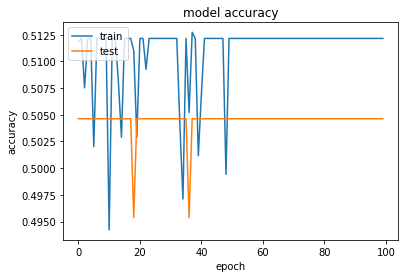

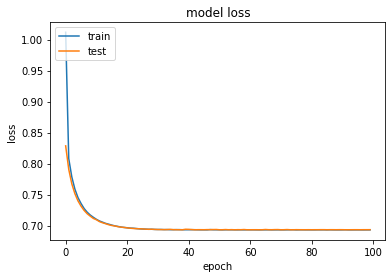

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

20 epoch + No Regularization


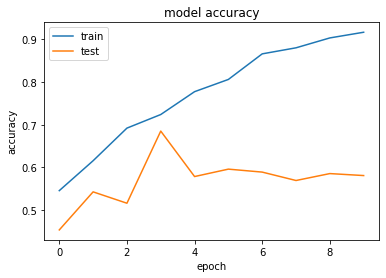

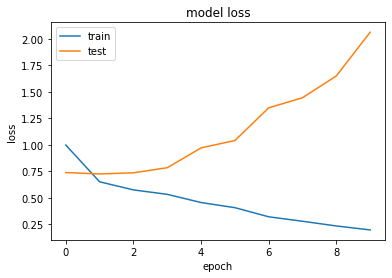

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

20 epoch + L2

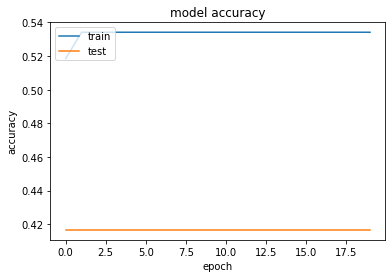

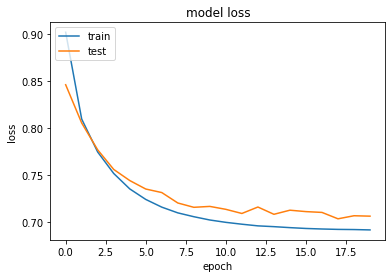

In [ ]:
# summarize history for accuracy
plt.plot(h2.history['accuracy'])
plt.plot(h2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h2.history['loss'])
plt.plot(h2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conv visualize

In [ ]:
modelv = Sequential()
modelv.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_np.shape[1:]))
modelv.add(Conv2D(32, (3, 3), activation='relu'))
modelv.add(MaxPooling2D(pool_size=(2,2)))
modelv.add(Dropout(0.5))

modelv.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelv.add(Conv2D(64, (3, 3), activation='relu'))
modelv.add(MaxPooling2D(pool_size=(2,2)))
modelv.add(Dropout(0.5))

modelv.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
modelv.add(Conv2D(64, (3, 3), activation='relu'))
modelv.add(MaxPooling2D(pool_size=(2,2)))
modelv.add(Dropout(0.5))

modelv.add(Flatten())

modelv.add(Dense(units = 128, activation = 'relu'))
modelv.add(Dropout(0.5))
modelv.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
modelv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [ ]:
modelv.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [ ]:
hist = modelv.fit(x_np, y_np,
                  batch_size=32,
                  epochs=50,
                  validation_split = 0.2,
                  callbacks=[checkpointer])

Train on 3148 samples, validate on 788 samples
Epoch 1/50
3148/3148 [==============================] - ETA: 0s - loss: 0.3460 - accuracy: 0.9009
Epoch 00001: val_accuracy improved from -inf to 0.96193, saving model to best_weights.hdf5
3148/3148 [==============================] - 14s 4ms/sample - loss: 0.3460 - accuracy: 0.9009 - val_loss: 0.1896 - val_accuracy: 0.9619
Epoch 2/50
3136/3148 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.9059
Epoch 00002: val_accuracy did not improve from 0.96193
3148/3148 [==============================] - 12s 4ms/sample - loss: 0.3220 - accuracy: 0.9060 - val_loss: 0.2462 - val_accuracy: 0.9619
Epoch 3/50
3136/3148 [============================>.] - ETA: 0s - loss: 0.3197 - accuracy: 0.9056
Epoch 00003: val_accuracy did not improve from 0.96193
3148/3148 [==============================] - 12s 4ms/sample - loss: 0.3189 - accuracy: 0.9060 - val_loss: 0.2036 - val_accuracy: 0.9619
Epoch 4/50
3136/3148 [============================

In [ ]:
modelv.load_weights('best_weights.hdf5')

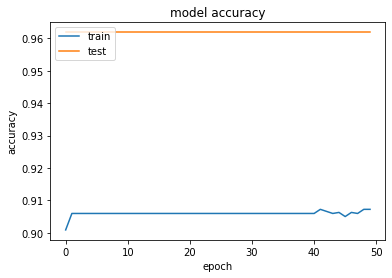

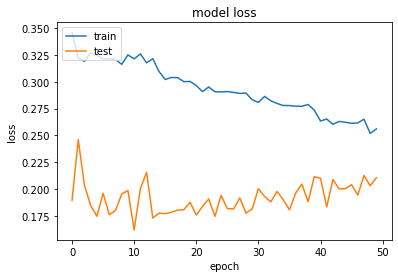

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

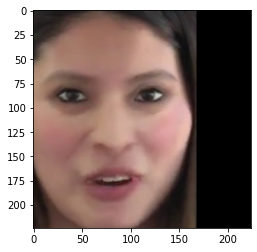

In [ ]:
img = cv2.imread('/content/00018_01.jpg')
resized_face = isotropically_resize_image(img, input_size)
resized_face = make_square_image(resized_face)
resized_face = cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB)
plt.imshow(resized_face)

In [ ]:
img = np.reshape(resized_face, (1,224,224,3))
img = img / 255.0
img.shape

(1, 224, 224, 3)

In [ ]:
res = modelv.predict(img)
res

array([[0.89977473]], dtype=float32)

In [ ]:
for i in range(len(modelv.layers)):
	layer = modelv.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_1 (None, 224, 224, 32)
1 conv2d_2 (None, 222, 222, 32)
4 conv2d_3 (None, 111, 111, 64)
5 conv2d_4 (None, 109, 109, 64)
8 conv2d_5 (None, 54, 54, 64)
9 conv2d_6 (None, 52, 52, 64)


In [ ]:
layer1_model = Model(inputs=modelv.inputs, outputs=modelv.layers[0].output)
layer1_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


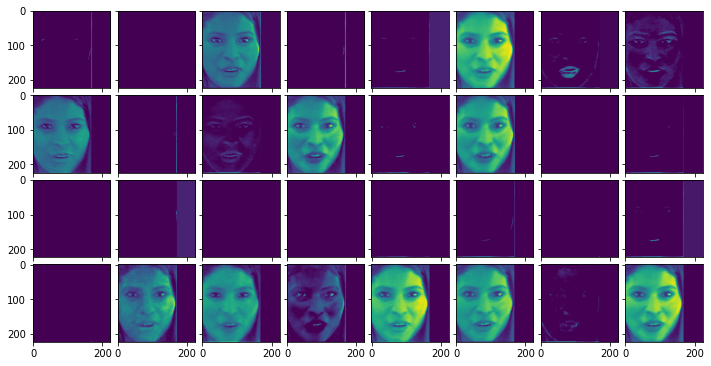

In [ ]:
feature_maps = layer1_model.predict(img)
# plot all 64 maps in an 8x8 squares
fig = plt.figure(figsize=(12, 12))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

ix = 1
for ax in grid:
    ax.imshow(feature_maps[0, :, :, ix-1])
    ix += 1
# show the figure
plt.show()

In [ ]:
ixs = [0,1,4,5,8,9]
outputs = [modelv.layers[i].output for i in ixs]
viz_model = Model(inputs=modelv.inputs, outputs=outputs)
viz_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      3692

conv2d_1_input


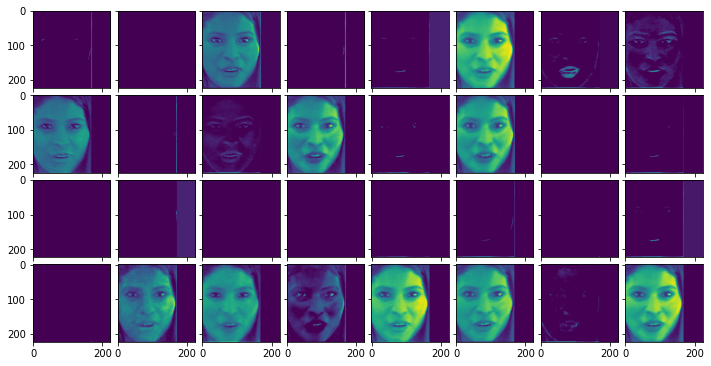

conv2d_1


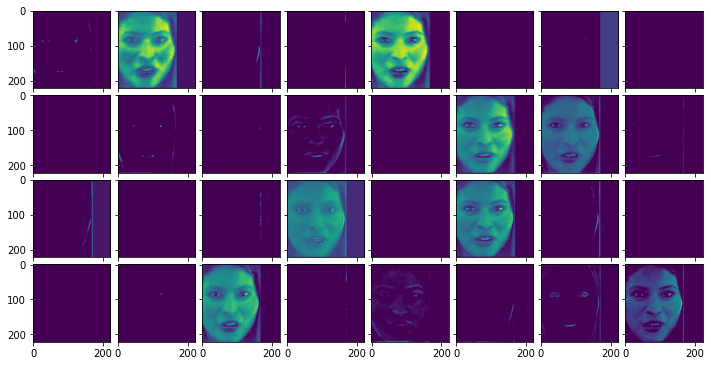

dropout


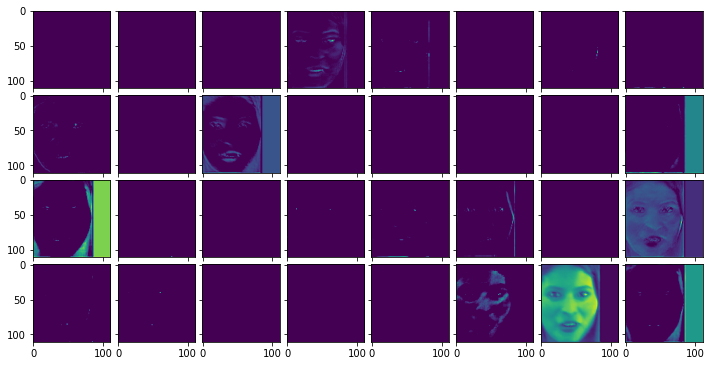

conv2d_3


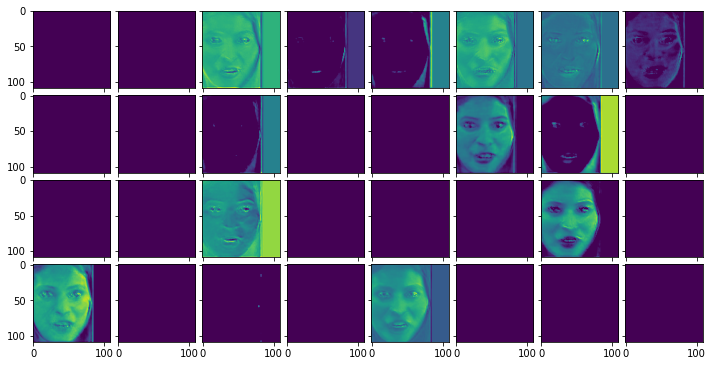

dropout_1


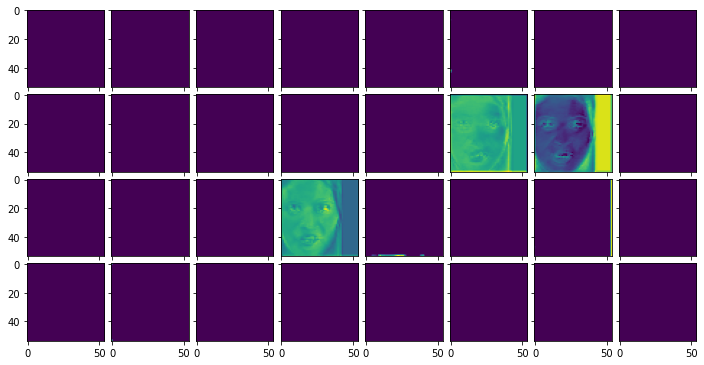

conv2d_5


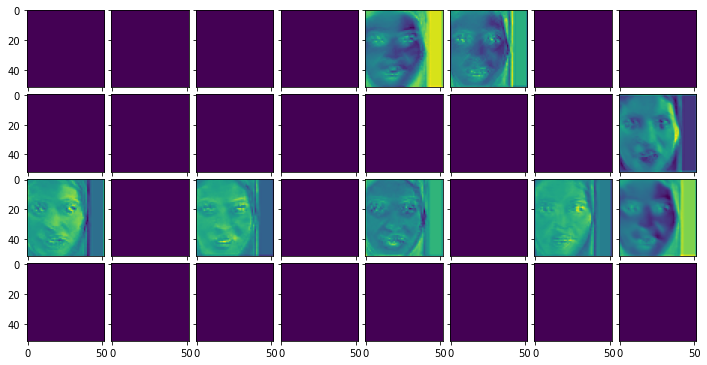

In [ ]:
feature_maps = viz_model.predict(img)

for (fmap, name) in zip(feature_maps,ixs):
    ix = 1
    print(viz_model.layers[name].name)
    name += 1
    fig = plt.figure(figsize=(12, 12))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(4, 8),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes in inch.
                    )
    for ax in grid:
        # plot filter channel in grayscale
        ax.imshow(fmap[0, :, :, ix-1])
        ix += 1
	# show the figure
    plt.show()

# **VGG 16**

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

hist_vgg = model.fit(x_np, y_np,
                  batch_size=32,
                  epochs=100,
                  validation_split = 0.2,
                  callbacks=[early])

Train on 3148 samples, validate on 788 samples
Epoch 1/100
3148/3148 [==============================] - 28s 9ms/sample - loss: 0.4625 - accuracy: 0.9028 - val_loss: 0.1808 - val_accuracy: 0.9645
Epoch 2/100
3148/3148 [==============================] - 26s 8ms/sample - loss: 0.3162 - accuracy: 0.9053 - val_loss: 0.1786 - val_accuracy: 0.9645
Epoch 3/100
3148/3148 [==============================] - 26s 8ms/sample - loss: 0.3180 - accuracy: 0.9053 - val_loss: 0.2183 - val_accuracy: 0.9645
Epoch 4/100
3148/3148 [==============================] - 26s 8ms/sample - loss: 0.3178 - accuracy: 0.9053 - val_loss: 0.1596 - val_accuracy: 0.9645
Epoch 5/100
3148/3148 [==============================] - 26s 8ms/sample - loss: 0.3174 - accuracy: 0.9053 - val_loss: 0.1962 - val_accuracy: 0.9645
Epoch 6/100
3148/3148 [==============================] - 26s 8ms/sample - loss: 0.3142 - accuracy: 0.9053 - val_loss: 0.2064 - val_accuracy: 0.9645
Epoch 7/100
3148/3148 [==============================] - 26s 8ms/

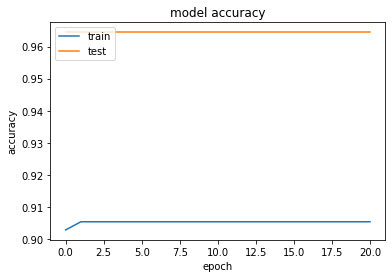

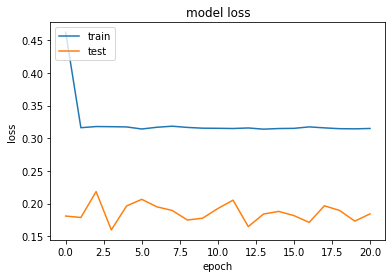

In [ ]:
# summarize history for accuracy
plt.plot(hist_vgg.history['accuracy'])
plt.plot(hist_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_vgg.history['loss'])
plt.plot(hist_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
res = model.predict(img)
res

array([[0.8989877]], dtype=float32)

In [ ]:
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv2d_3 (None, 224, 224, 64)
1 conv2d_4 (None, 224, 224, 64)
3 conv2d_5 (None, 112, 112, 128)
4 conv2d_6 (None, 112, 112, 128)
6 conv2d_7 (None, 56, 56, 256)
7 conv2d_8 (None, 56, 56, 256)
8 conv2d_9 (None, 56, 56, 256)
10 conv2d_10 (None, 28, 28, 512)
11 conv2d_11 (None, 28, 28, 512)
12 conv2d_12 (None, 28, 28, 512)
14 conv2d_13 (None, 14, 14, 512)
15 conv2d_14 (None, 14, 14, 512)
16 conv2d_15 (None, 14, 14, 512)


In [ ]:
# redefine model to output right after the first hidden layer
ixs = [1, 4, 8, 12, 16]
outputs = [model.layers[i].output for i in ixs]
viz_model = Model(inputs=model.inputs, outputs=outputs)
viz_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0   

conv2d_3


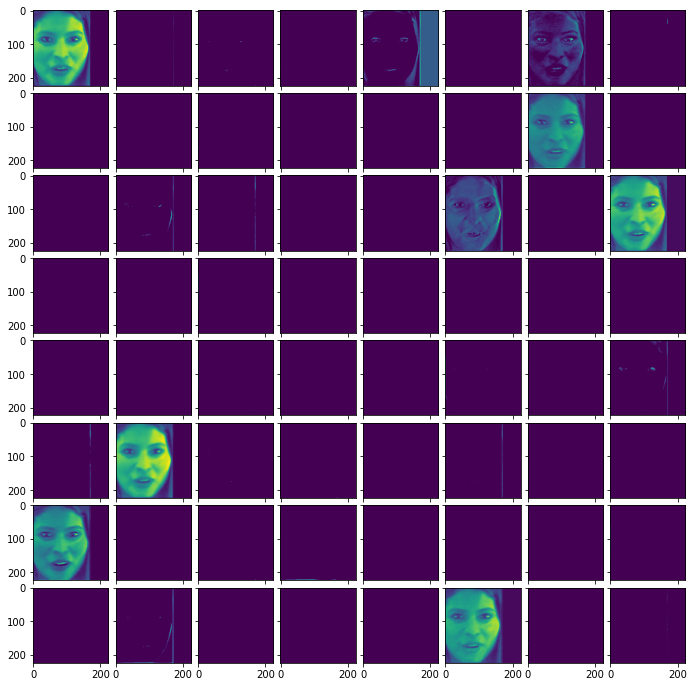

conv2d_5


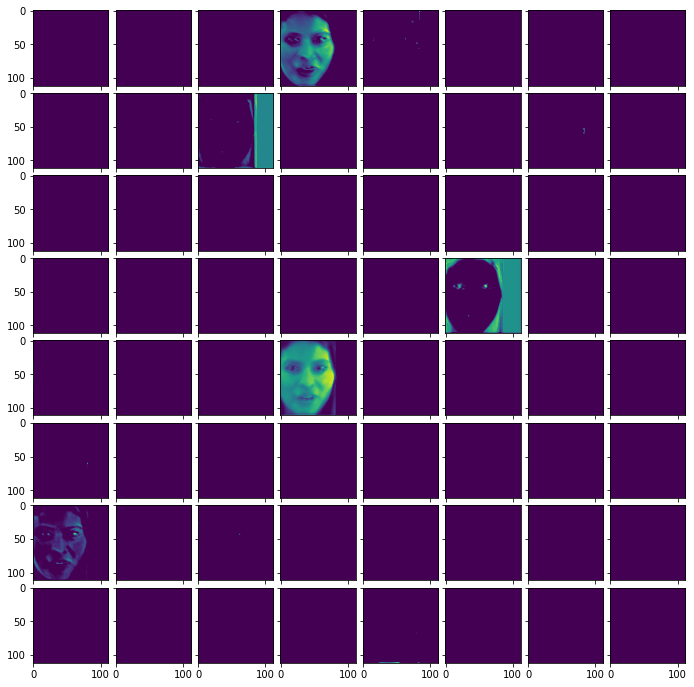

conv2d_8


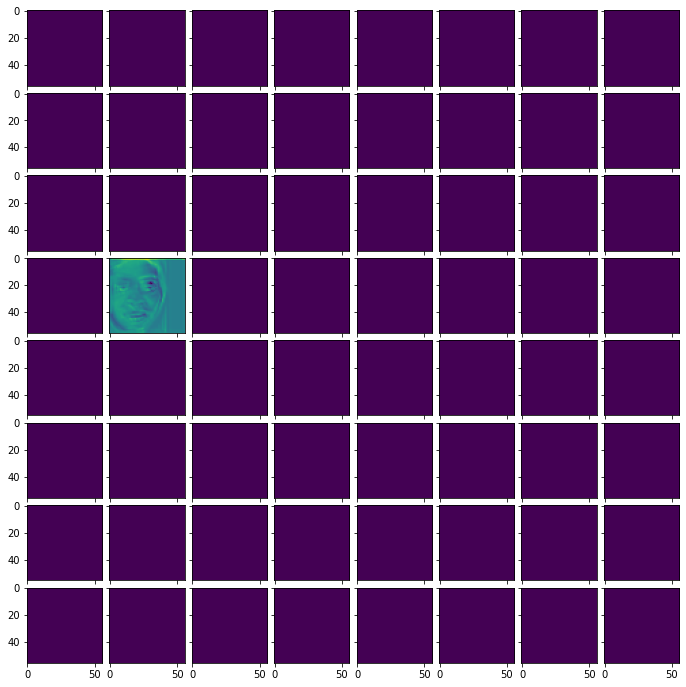

conv2d_11


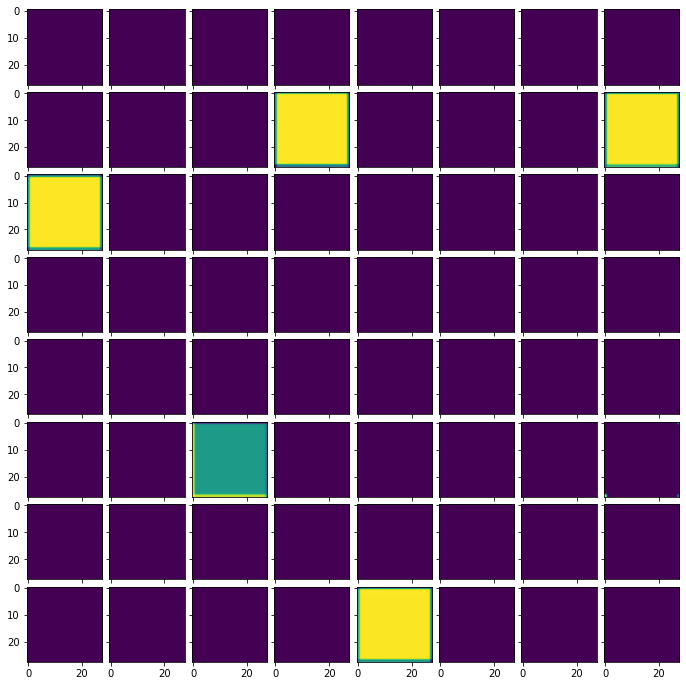

conv2d_14


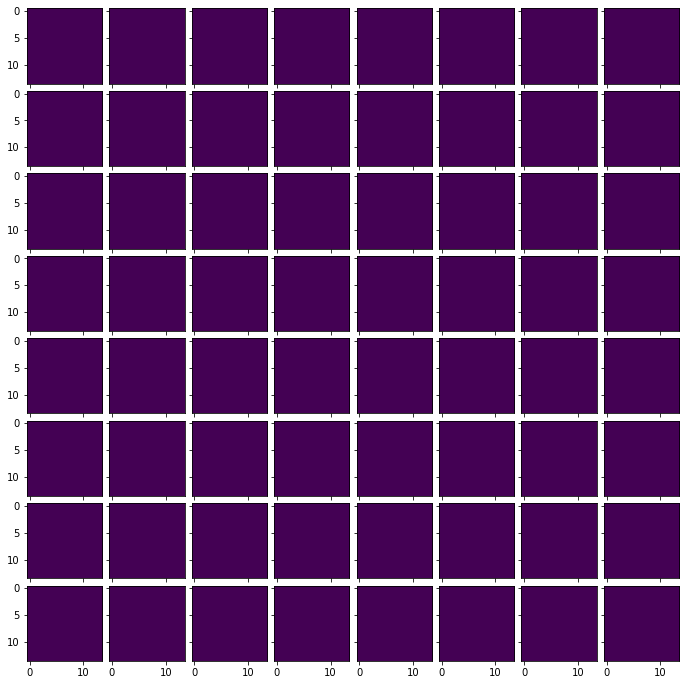

In [ ]:
feature_maps = viz_model.predict(img)

for (fmap, name) in zip(feature_maps,ixs):
    ix = 1
    print(viz_model.layers[name].name)
    name += 1
    fig = plt.figure(figsize=(12, 12))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes in inch.
                    )
    for ax in grid:
        # plot filter channel in grayscale
        ax.imshow(fmap[0, :, :, ix-1])
        ix += 1
	# show the figure
    plt.show()

# Pytorch Densenet

In [ ]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
from collections import OrderedDict
from torchsummary import summary

In [ ]:
x_t_train = torch.from_numpy(X_train).permute(0,3,1,2).to(device='cuda')
y_t_train = torch.from_numpy(Y_train).to(device='cuda')

x_t_val = torch.from_numpy(X_val).permute(0,3,1,2).to(device='cuda')
y_t_val = torch.from_numpy(Y_val).to(device='cuda')

print(x_t_train.size())
print(y_t_train.size())
print(x_t_val.size())
print(y_t_val.size())

torch.Size([4908, 3, 224, 224])

In [ ]:
dense_net = torch.hub.load('pytorch/vision:v0.6.0', 'densenet161', pretrained=True)

n_inputs = dense_net.classifier.in_features

classifier = nn.Sequential(
            nn.Linear(n_inputs, 512),  
            nn.ReLU(), 
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,1)         
)

dense_net.classifier = classifier
dense_net.to(device='cuda')

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
x_t_train.dtype

torch.float64

In [ ]:
with torch.no_grad():
    out = dense_net(x_t_train.type(torch.cuda.FloatTensor))

RuntimeError: ignored

In [ ]:
out

tensor([[0.0218]], device='cuda:0')

# DenseNet Keras

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_d=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
x= Dense(512,activation='relu')(x) 
x= Dense(256,activation='relu')(x) 
x= BatchNormalization()(x)
x= Dropout(0.5)(x)

preds=Dense(1,activation='sigmoid')(x) #FC-lay

In [ ]:
model=Model(inputs=model_d.input,outputs=preds)

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC()])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(horizontal_flip=True, shear_range=0.15)


datagen.fit(X_train)
# Fits-the-model
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
               steps_per_epoch=X_train.shape[0] //128,
               epochs=100,
               verbose=1,
               callbacks=[anne, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.8983 - accuracy: 0.5510 - auc_1: 0.5818
Epoch 00001: val_loss improved from inf to 0.73920, saving model to model.h5
38/38 [==============================] - 162s 4s/step - loss: 0.8983 - accuracy: 0.5510 - auc_1: 0.5818 - val_loss: 0.7392 - val_accuracy: 0.5004 - val_auc_1: 0.5758 - lr: 0.0100
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 0.7856 - accuracy: 0.5987 - auc_1: 0.6390
Epoch 00002: val_loss did not improve from 0.73920
38/38 [==============================] - 17s 459ms/step - loss: 0.7856 - accuracy: 0.5987 - auc_1: 0.6390 - val_loss: 0.7823 - val_accuracy: 0.4996 - val_auc_1: 0.6144 - lr: 0.0100
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.7247 - accuracy: 0.6324 - auc_1: 0.6810
Epoch 00003: val_loss did not improve from 0.73920
38/38 [==============================] - 23s 614ms/step - loss: 0.7247 - accuracy: 0.6324 - auc_1: 0.6810 - val_loss: 0.8233 - v

dict_keys(['loss', 'accuracy', 'auc_1', 'val_loss', 'val_accuracy', 'val_auc_1', 'lr'])


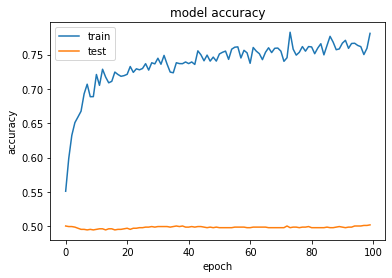

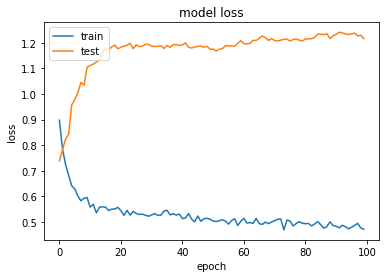

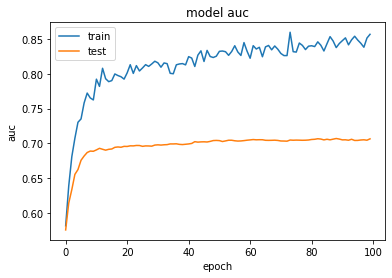

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()